In [1]:
## R code 12.1
library(rethinking)
data(reedfrogs)
d <- reedfrogs
str(d)

Loading required package: rstan
Loading required package: ggplot2
rstan (Version 2.9.0, packaged: 2016-01-05 16:17:47 UTC, GitRev: 05c3d0058b6a)
For execution on a local, multicore CPU with excess RAM we recommend calling
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())
Loading required package: parallel
rethinking (Version 1.58)


'data.frame':	48 obs. of  5 variables:
 $ density : int  10 10 10 10 10 10 10 10 10 10 ...
 $ pred    : Factor w/ 2 levels "no","pred": 1 1 1 1 1 1 1 1 2 2 ...
 $ size    : Factor w/ 2 levels "big","small": 1 1 1 1 2 2 2 2 1 1 ...
 $ surv    : int  9 10 7 10 9 9 10 9 4 9 ...
 $ propsurv: num  0.9 1 0.7 1 0.9 0.9 1 0.9 0.4 0.9 ...


In [2]:
## R code 12.2
library(rethinking)
data(reedfrogs)
d <- reedfrogs

In [3]:
# make the tank cluster variable
d$tank <- 1:nrow(d)

# fit
m12.1 <- map2stan(
    alist(
        surv ~ dbinom( density , p ) ,
        logit(p) <- a_tank[tank] ,
        a_tank[tank] ~ dnorm( 0 , 5 )
    ),
    data=d )

Warning message:
In FUN(X[[i]], ...): data with name pred is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name size is not numeric and not used


SAMPLING FOR MODEL 'surv ~ dbinom(density, p)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1, Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1, Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1, Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1, Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1, Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1, Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1, Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1, Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1, Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1, Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1, Iteration: 2000 / 2000 [100%]  (Sampling)# 
#  Elapsed Time: 1.18661 seconds (Warm-up)
#                1.29859 seconds (Sampling)
#                2.48521 seconds (Total)
# 


Warning message:
In FUN(X[[i]], ...): data with name pred is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name size is not numeric and not used


SAMPLING FOR MODEL 'surv ~ dbinom(density, p)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.000332 seconds (Sampling)
#                0.000335 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 1000 / 1000 ]


Aggregated binomial counts detected. Splitting to 0/1 outcome for WAIC calculation.


In [4]:
## R code 12.3
m12.2 <- map2stan(
    alist(
        surv ~ dbinom( density , p ) ,
        logit(p) <- a_tank[tank] ,
        a_tank[tank] ~ dnorm( a , sigma ) ,
        a ~ dnorm(0,1) ,
        sigma ~ dcauchy(0,1)
    ), data=d , iter=4000 , chains=4 )

Warning message:
In FUN(X[[i]], ...): data with name pred is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name size is not numeric and not used


SAMPLING FOR MODEL 'surv ~ dbinom(density, p)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1, Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1, Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1, Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1, Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1, Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1, Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1, Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1, Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1, Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1, Iteration: 4000 / 4000 [100%]  (Sampling)# 
#  Elapsed Time: 2.07993 seconds (Warm-up)
#                1.75629 seconds (Sampling)
#                3.83622 seconds (Total)
# 


The following numerical problems occured the indicated number of times after warmup on chain 1
                                                                                count
Exception thrown at line 17: normal_log: Scale parameter is 0, but must be > 0!     1
When a numerical problem occurs, the Metropolis proposal gets rejected.
However, by design Metropolis proposals sometimes get rejected even when there are no numerical problems.
Thus, if the number in the 'count' column is small, do not ask about this message on stan-users.



SAMPLING FOR MODEL 'surv ~ dbinom(density, p)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 2, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 2, Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 2, Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 2, Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 2, Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 2, Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 2, Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 2, Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 2, Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 2, Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 2, Iteration: 4000 / 4000 [100%]  (Sampling)# 
#  Elapsed Time: 2.18188 seconds (Warm-up)
#                1.77086 seconds (Sampling)
#                3.95274 seconds (Total)
# 

SAMPLING FOR MODEL 'surv ~ dbinom(density, p)' NOW (CHAIN 3).

Chain 3, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 3, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 3, Iteration:  800 / 4000 [ 20%]  (

The following numerical problems occured the indicated number of times after warmup on chain 4
                                                                                count
Exception thrown at line 17: normal_log: Scale parameter is 0, but must be > 0!     1
When a numerical problem occurs, the Metropolis proposal gets rejected.
However, by design Metropolis proposals sometimes get rejected even when there are no numerical problems.
Thus, if the number in the 'count' column is small, do not ask about this message on stan-users.
Warning message:
In FUN(X[[i]], ...): data with name pred is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name size is not numeric and not used


SAMPLING FOR MODEL 'surv ~ dbinom(density, p)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 2e-06 seconds (Warm-up)
#                0.000319 seconds (Sampling)
#                0.000321 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 8000 / 8000 ]


Aggregated binomial counts detected. Splitting to 0/1 outcome for WAIC calculation.
Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

In [5]:
## R code 12.4
compare( m12.1 , m12.2 )

        WAIC pWAIC dWAIC weight    SE  dSE
m12.2 1010.4  38.1   0.0      1 38.06   NA
m12.1 1024.2  49.8  13.8      0 43.06 6.57

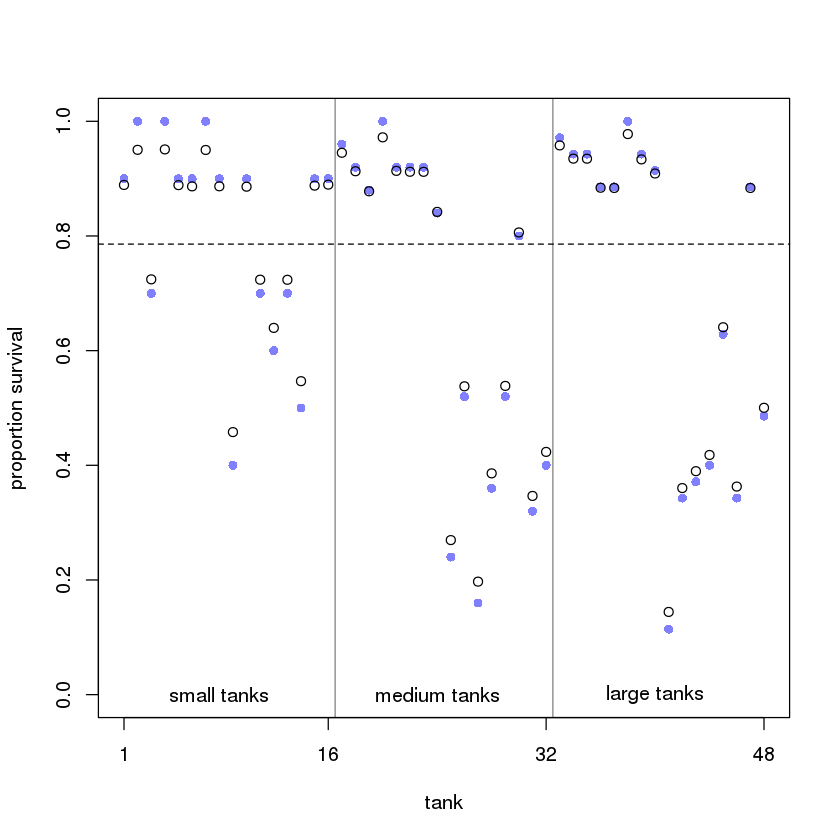

In [6]:
## R code 12.5
# extract Stan samples
post <- extract.samples(m12.2)

# compute median intercept for each tank
# also transform to probability with logistic
d$propsurv.est <- logistic( apply( post$a_tank , 2 , median ) )

# display raw proportions surviving in each tank
plot( d$propsurv , ylim=c(0,1) , pch=16 , xaxt="n" ,
    xlab="tank" , ylab="proportion survival" , col=rangi2 )
axis( 1 , at=c(1,16,32,48) , labels=c(1,16,32,48) )

# overlay posterior medians
points( d$propsurv.est )

# mark posterior median probability across tanks
abline( h=logistic(median(post$a)) , lty=2 )

# draw vertical dividers between tank densities
abline( v=16.5 , lwd=0.5 )
abline( v=32.5 , lwd=0.5 )
text( 8 , 0 , "small tanks" )
text( 16+8 , 0 , "medium tanks" )
text( 32+8 , 0 , "large tanks" )

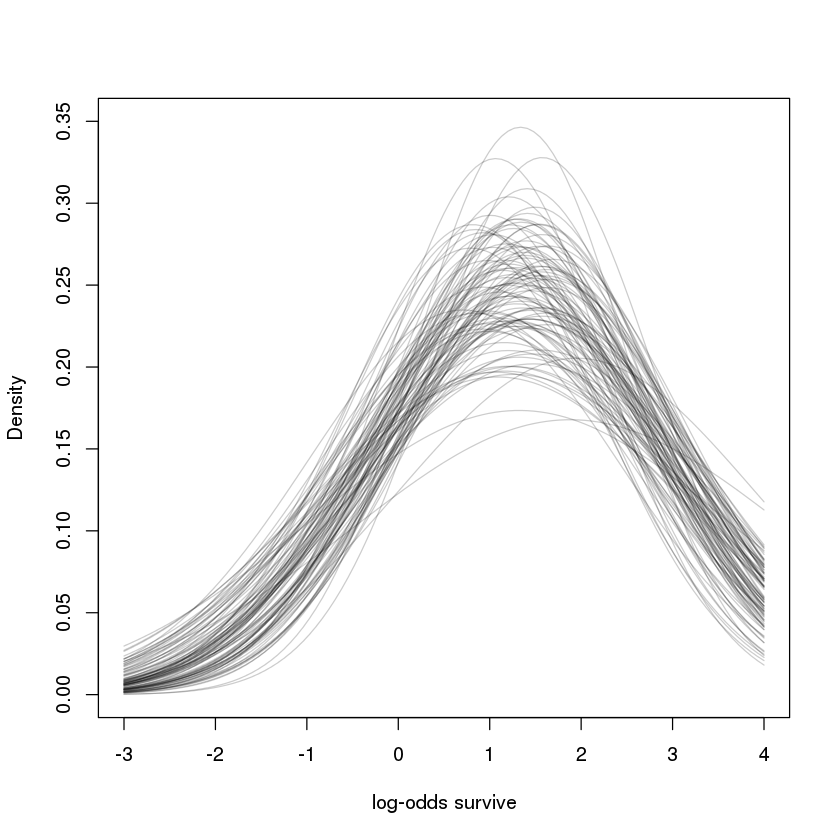

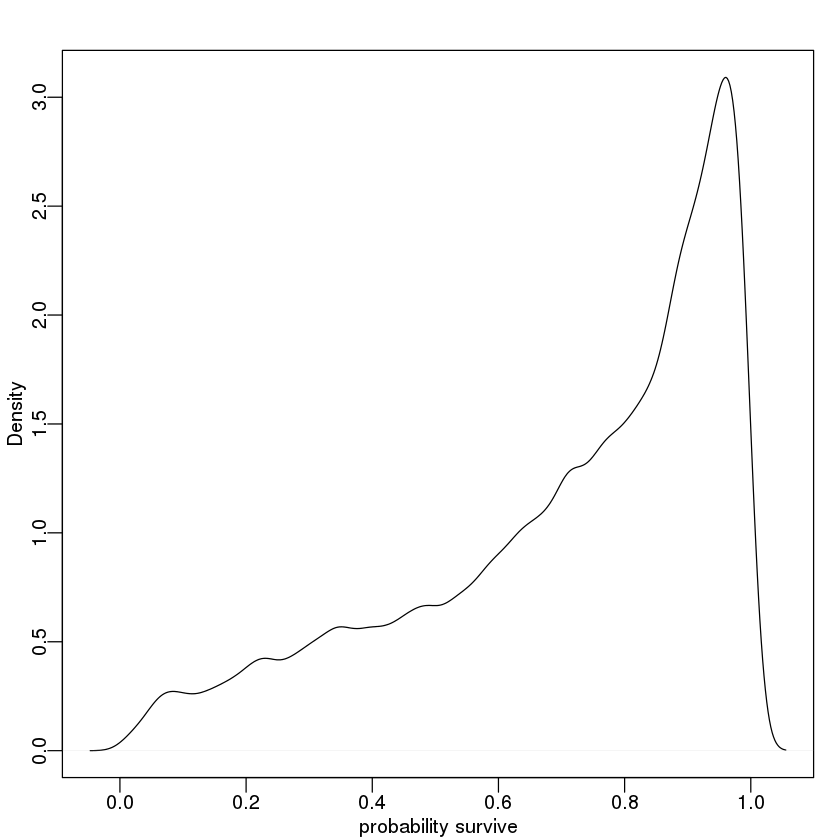

In [7]:
## R code 12.6
# show first 100 populations in the posterior
plot( NULL , xlim=c(-3,4) , ylim=c(0,0.35) ,
    xlab="log-odds survive" , ylab="Density" )
for ( i in 1:100 )
    curve( dnorm(x,post$a[i],post$sigma[i]) , add=TRUE ,
    col=col.alpha("black",0.2) )

# sample 8000 imaginary tanks from the posterior distribution
sim_tanks <- rnorm( 8000 , post$a , post$sigma )

# transform to probability and visualize
dens( logistic(sim_tanks) , xlab="probability survive" )

In [8]:
## R code 12.7
a <- 1.4
sigma <- 1.5
nponds <- 60
ni <- as.integer( rep( c(5,10,25,35) , each=15 ) )

In [9]:
## R code 12.8
a_pond <- rnorm( nponds , mean=a , sd=sigma )

In [10]:
## R code 12.9
dsim <- data.frame( pond=1:nponds , ni=ni , true_a=a_pond )

In [11]:
## R code 12.10
class(1:3)
class(c(1,2,3))

[1] "integer"

[1] "numeric"

In [12]:
## R code 12.11
dsim$si <- rbinom( nponds , prob=logistic(dsim$true_a) , size=dsim$ni )

In [13]:
## R code 12.12
dsim$p_nopool <- dsim$si / dsim$ni

In [14]:
## R code 12.13
m12.3 <- map2stan(
    alist(
        si ~ dbinom( ni , p ),
        logit(p) <- a_pond[pond],
        a_pond[pond] ~ dnorm( a , sigma ),
        a ~ dnorm(0,1),
        sigma ~ dcauchy(0,1)
    ),
    data=dsim , iter=1e4 , warmup=1000 )


SAMPLING FOR MODEL 'si ~ dbinom(ni, p)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1, Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1, Iteration: 1001 / 10000 [ 10%]  (Sampling)
Chain 1, Iteration: 2000 / 10000 [ 20%]  (Sampling)
Chain 1, Iteration: 3000 / 10000 [ 30%]  (Sampling)
Chain 1, Iteration: 4000 / 10000 [ 40%]  (Sampling)
Chain 1, Iteration: 5000 / 10000 [ 50%]  (Sampling)
Chain 1, Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1, Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1, Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1, Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1, Iteration: 10000 / 10000 [100%]  (Sampling)# 
#  Elapsed Time: 1.70214 seconds (Warm-up)
#                12.9564 seconds (Sampling)
#                14.6585 seconds (Total)
# 


The following numerical problems occured the indicated number of times after warmup on chain 1
                                                                                count
Exception thrown at line 17: normal_log: Scale parameter is 0, but must be > 0!     1
When a numerical problem occurs, the Metropolis proposal gets rejected.
However, by design Metropolis proposals sometimes get rejected even when there are no numerical problems.
Thus, if the number in the 'count' column is small, do not ask about this message on stan-users.



SAMPLING FOR MODEL 'si ~ dbinom(ni, p)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.000366 seconds (Sampling)
#                0.000369 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 9000 / 9000 ]


Aggregated binomial counts detected. Splitting to 0/1 outcome for WAIC calculation.


In [15]:
## R code 12.14
precis(m12.3,depth=2)

            Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
a_pond[1]   0.71   0.83      -0.61       2.02  9000    1
a_pond[2]   1.50   0.96      -0.03       2.99  9000    1
a_pond[3]   0.72   0.84      -0.67       1.97  9000    1
a_pond[4]   0.70   0.85      -0.62       2.10  8161    1
a_pond[5]   2.57   1.16       0.74       4.32  7587    1
a_pond[6]   2.57   1.16       0.74       4.33  7387    1
a_pond[7]  -0.63   0.86      -1.96       0.74  9000    1
a_pond[8]  -0.63   0.87      -2.00       0.74  9000    1
a_pond[9]   0.04   0.83      -1.25       1.36  9000    1
a_pond[10] -1.40   0.97      -2.88       0.14  6872    1
a_pond[11] -0.64   0.86      -1.99       0.77  8107    1
a_pond[12]  2.54   1.14       0.70       4.30  9000    1
a_pond[13]  2.58   1.17       0.75       4.36  9000    1
a_pond[14]  1.49   0.93       0.08       3.01  9000    1
a_pond[15]  2.55   1.15       0.70       4.29  6634    1
a_pond[16]  1.00   0.68      -0.08       2.07  9000    1
a_pond[17]  2.96   1.10       1

In [16]:
## R code 12.15
estimated.a_pond <- as.numeric( coef(m12.3)[1:60] )
dsim$p_partpool <- logistic( estimated.a_pond )

In [17]:
## R code 12.16
dsim$p_true <- logistic( dsim$true_a )

In [18]:
## R code 12.17
nopool_error <- abs( dsim$p_nopool - dsim$p_true )
partpool_error <- abs( dsim$p_partpool - dsim$p_true )

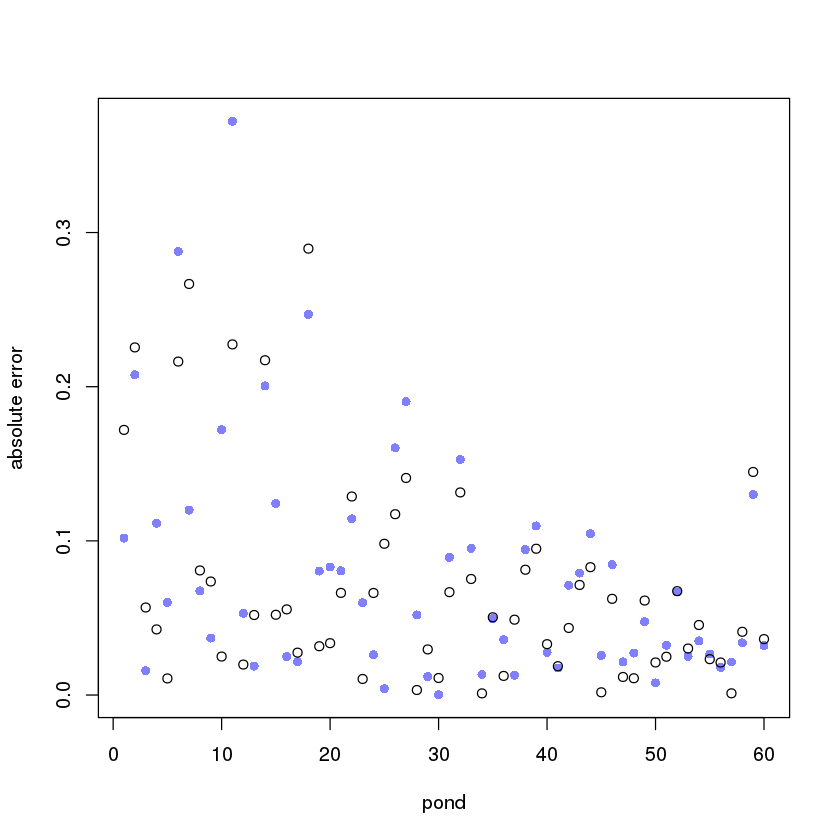

In [19]:
## R code 12.18
plot( 1:60 , nopool_error , xlab="pond" , ylab="absolute error" ,
    col=rangi2 , pch=16 )
points( 1:60 , partpool_error )

In [20]:
## R code 12.19
a <- 1.4
sigma <- 1.5
nponds <- 60
ni <- as.integer( rep( c(5,10,25,35) , each=15 ) )
a_pond <- rnorm( nponds , mean=a , sd=sigma )
dsim <- data.frame( pond=1:nponds , ni=ni , true_a=a_pond )
dsim$si <- rbinom( nponds,prob=logistic( dsim$true_a ),size=dsim$ni )
dsim$p_nopool <- dsim$si / dsim$ni
newdat <- list(si=dsim$si,ni=dsim$ni,pond=1:nponds)
m12.3new <- map2stan( m12.3 , data=newdat , iter=1e4 , warmup=1000 )


SAMPLING FOR MODEL 'si ~ dbinom(ni, p)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1, Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1, Iteration: 1001 / 10000 [ 10%]  (Sampling)
Chain 1, Iteration: 2000 / 10000 [ 20%]  (Sampling)
Chain 1, Iteration: 3000 / 10000 [ 30%]  (Sampling)
Chain 1, Iteration: 4000 / 10000 [ 40%]  (Sampling)
Chain 1, Iteration: 5000 / 10000 [ 50%]  (Sampling)
Chain 1, Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1, Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1, Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1, Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1, Iteration: 10000 / 10000 [100%]  (Sampling)# 
#  Elapsed Time: 1.62599 seconds (Warm-up)
#                9.22287 seconds (Sampling)
#                10.8489 seconds (Total)
# 

SAMPLING FOR MODEL 'si ~ dbinom(ni, p)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.00039 seconds (Sampling)


Computing WAIC
Constructing posterior predictions


[ 9000 / 9000 ]


Aggregated binomial counts detected. Splitting to 0/1 outcome for WAIC calculation.


In [21]:
## R code 12.20
y1 <- rnorm( 1e4 , 10 , 1 )
y2 <- 10 + rnorm( 1e4 , 0 , 1 )

In [22]:
## R code 12.21
library(rethinking)
data(chimpanzees)
d <- chimpanzees
d$recipient <- NULL     # get rid of NAs

m12.4 <- map2stan(
    alist(
        pulled_left ~ dbinom( 1 , p ) ,
        logit(p) <- a + a_actor[actor] + (bp + bpC*condition)*prosoc_left ,
        a_actor[actor] ~ dnorm( 0 , sigma_actor ),
        a ~ dnorm(0,10),
        bp ~ dnorm(0,10),
        bpC ~ dnorm(0,10),
        sigma_actor ~ dcauchy(0,1)
    ) ,
    data=d , warmup=1000 , iter=5000 , chains=4 , cores=3 )


SAMPLING FOR MODEL 'pulled_left ~ dbinom(1, p)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.001333 seconds (Sampling)
#                0.001336 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 16000 / 16000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

In [23]:
## R code 12.22
post <- extract.samples(m12.4)
total_a_actor <- sapply( 1:7 , function(actor) post$a + post$a_actor[,actor] )
round( apply(total_a_actor,2,mean) , 2 )

[1] -0.71  4.63 -1.01 -1.01 -0.71  0.23  1.76

In [24]:
## R code 12.23
# prep data
d$block_id <- d$block  # name 'block' is reserved by Stan

m12.5 <- map2stan(
    alist(
        pulled_left ~ dbinom( 1 , p ),
        logit(p) <- a + a_actor[actor] + a_block[block_id] +
                    (bp + bpc*condition)*prosoc_left,
        a_actor[actor] ~ dnorm( 0 , sigma_actor ),
        a_block[block_id] ~ dnorm( 0 , sigma_block ),
        c(a,bp,bpc) ~ dnorm(0,10),
        sigma_actor ~ dcauchy(0,1),
        sigma_block ~ dcauchy(0,1)
    ) ,
    data=d, warmup=1000 , iter=6000 , chains=4 , cores=3 )

Warning message:
: There were 53 divergent transitions after warmup. Increasing adapt_delta above 0.8 may help.Warning message:
: Examine the pairs() plot to diagnose sampling problems



SAMPLING FOR MODEL 'pulled_left ~ dbinom(1, p)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.001532 seconds (Sampling)
#                0.001535 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 20000 / 20000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In map2stan(alist(pulled_left ~ dbinom(1, p), logit(p) <- a + a_actor[actor] + : There were 53 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid.

Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be usedWarning message:
In precis(m12.5, depth = 2): There were 53 divergent iterations during sampling.
Check the chains (trace plots, n_eff, Rhat) carefully to ensure they are valid.

             Mean StdDev lower 0.89 upper 0.89 n_eff Rhat
a_actor[1]  -1.17   0.96      -2.63       0.27  3321    1
a_actor[2]   4.19   1.64       1.96       6.58  4351    1
a_actor[3]  -1.47   0.97      -2.99      -0.05  3222    1
a_actor[4]  -1.48   0.97      -2.89       0.05  3275    1
a_actor[5]  -1.17   0.96      -2.66       0.27  3240    1
a_actor[6]  -0.22   0.97      -1.66       1.27  3248    1
a_actor[7]   1.32   1.00      -0.21       2.82  3187    1
a_block[1]  -0.19   0.23      -0.55       0.11  2387    1
a_block[2]   0.04   0.19      -0.21       0.38  7721    1
a_block[3]   0.05   0.19      -0.24       0.34  7585    1
a_block[4]   0.01   0.19      -0.27       0.32  8463    1
a_block[5]  -0.03   0.19      -0.33       0.25  7969    1
a_block[6]   0.12   0.20      -0.16       0.45  3934    1
a            0.45   0.95      -0.99       1.90  3219    1
bp           0.83   0.26       0.42       1.26  8269    1
bpc         -0.14   0.30      -0.61       0.35  8703    1
sigma_actor  2

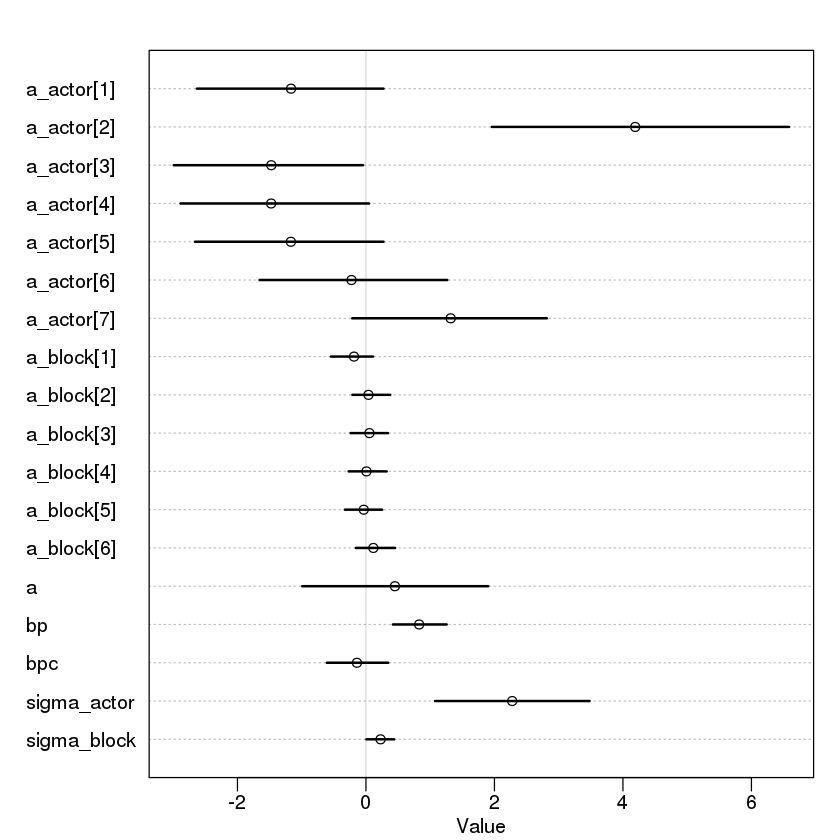

In [25]:
## R code 12.24
precis(m12.5,depth=2) # depth=2 displays varying effects
plot(precis(m12.5,depth=2)) # also plot

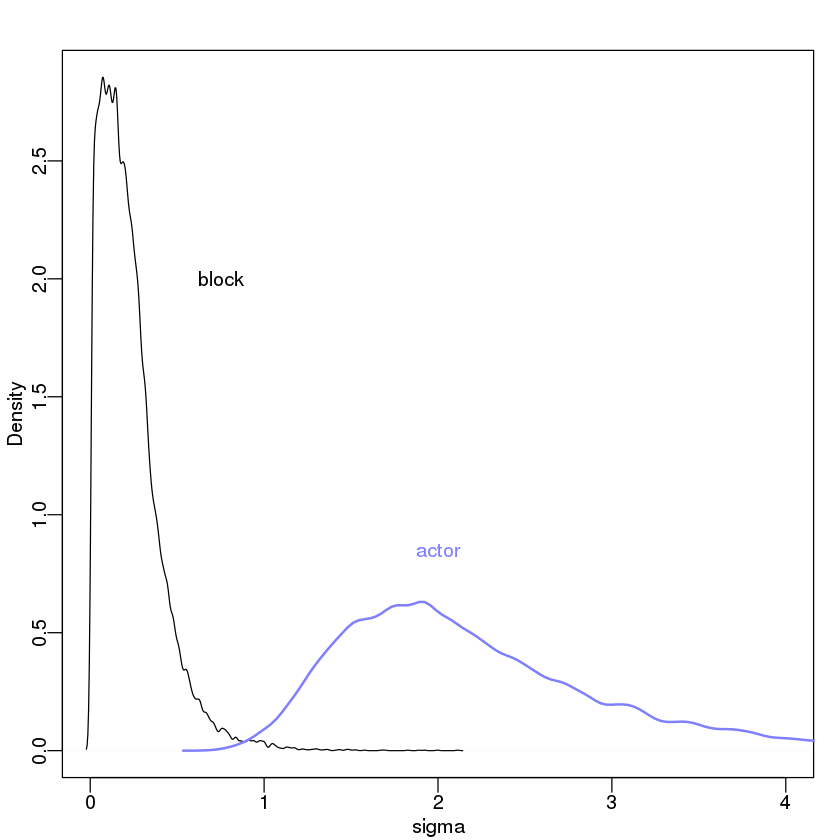

In [26]:
## R code 12.25
post <- extract.samples(m12.5)
dens( post$sigma_block , xlab="sigma" , xlim=c(0,4) )
dens( post$sigma_actor , col=rangi2 , lwd=2 , add=TRUE )
text( 2 , 0.85 , "actor" , col=rangi2 )
text( 0.75 , 2 , "block" )

In [27]:
## R code 12.26
compare(m12.4,m12.5)

       WAIC pWAIC dWAIC weight    SE dSE
m12.4 531.4   8.1   0.0   0.64 19.44  NA
m12.5 532.5  10.4   1.1   0.36 19.65 1.8

In [28]:
## R code 12.27
chimp <- 2
d.pred <- list(
    prosoc_left = c(0,1,0,1),   # right/left/right/left
    condition = c(0,0,1,1),     # control/control/partner/partner
    actor = rep(chimp,4)
)
link.m12.4 <- link( m12.4 , data=d.pred )
pred.p <- apply( link.m12.4 , 2 , mean )
pred.p.PI <- apply( link.m12.4 , 2 , PI )

[ 1000 / 1000 ]


In [29]:
## R code 12.28
post <- extract.samples(m12.4)
str(post)

List of 5
 $ a_actor    : num [1:16000, 1:7] -1.726 -2.604 -0.979 -0.968 -1.885 ...
 $ a          : num [1:16000(1d)] 0.864 1.589 0.169 0.398 1.542 ...
 $ bp         : num [1:16000(1d)] 0.864 1.058 0.987 1.054 0.604 ...
 $ bpC        : num [1:16000(1d)] -0.411 -0.491 -0.271 -0.521 -0.261 ...
 $ sigma_actor: num [1:16000(1d)] 3.27 3.48 1.75 2.07 2.06 ...


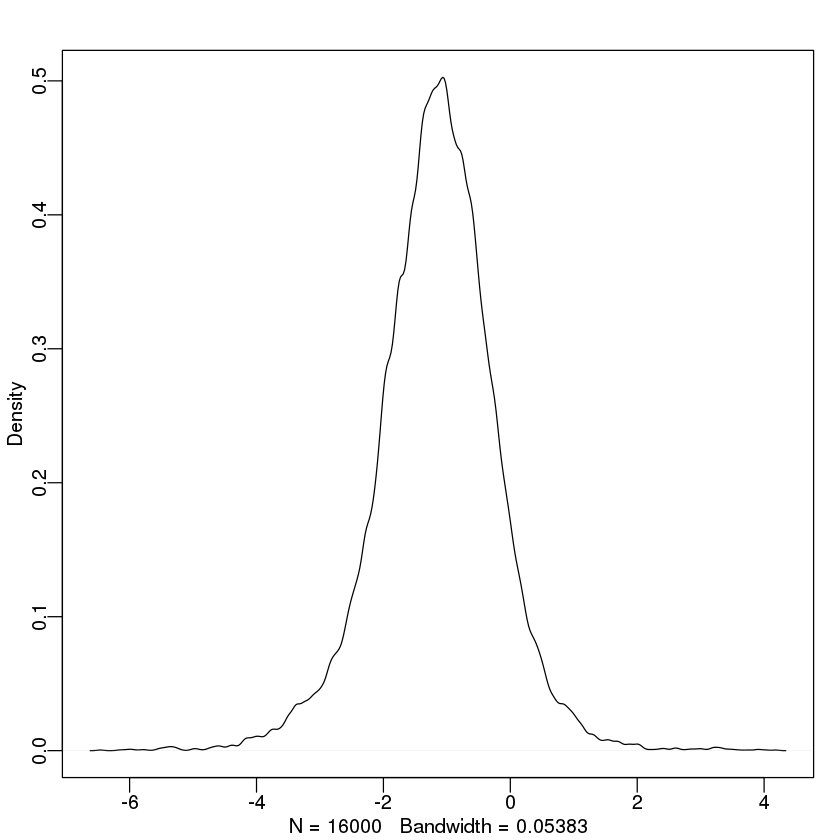

In [30]:
## R code 12.29
dens( post$a_actor[,5] )

In [31]:
## R code 12.30
p.link <- function( prosoc_left , condition , actor ) {
    logodds <- with( post ,
        a + a_actor[,actor] + (bp + bpC * condition) * prosoc_left
    )
    return( logistic(logodds) )
}

In [32]:
## R code 12.31
prosoc_left <- c(0,1,0,1)
condition <- c(0,0,1,1)
pred.raw <- sapply( 1:4 , function(i) p.link(prosoc_left[i],condition[i],2) )
pred.p <- apply( pred.raw , 2 , mean )
pred.p.PI <- apply( pred.raw , 2 , PI )

In [33]:
## R code 12.32
d.pred <- list(
    prosoc_left = c(0,1,0,1),   # right/left/right/left
    condition = c(0,0,1,1),     # control/control/partner/partner
    actor = rep(2,4) )          # placeholder

In [34]:
## R code 12.33
# replace varying intercept samples with zeros
# 1000 samples by 7 actors
a_actor_zeros <- matrix(0,1000,7)

[ 1000 / 1000 ]


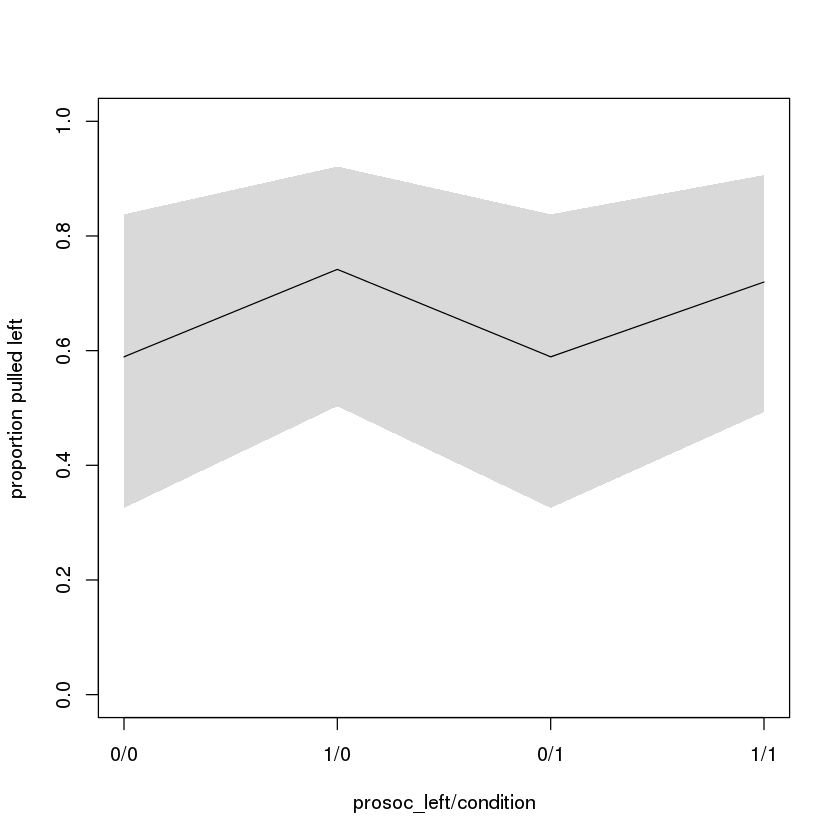

In [35]:
## R code 12.34
# fire up link
# note use of replace list
link.m12.4 <- link( m12.4 , n=1000 , data=d.pred ,
    replace=list(a_actor=a_actor_zeros) )

# summarize and plot
pred.p.mean <- apply( link.m12.4 , 2 , mean )
pred.p.PI <- apply( link.m12.4 , 2 , PI , prob=0.8 )
plot( 0 , 0 , type="n" , xlab="prosoc_left/condition" ,
    ylab="proportion pulled left" , ylim=c(0,1) , xaxt="n" ,
    xlim=c(1,4) )
axis( 1 , at=1:4 , labels=c("0/0","1/0","0/1","1/1") )
lines( 1:4 , pred.p.mean )
shade( pred.p.PI , 1:4 )

In [36]:
## R code 12.35
# replace varying intercept samples with simulations
post <- extract.samples(m12.4)
a_actor_sims <- rnorm(7000,0,post$sigma_actor)
a_actor_sims <- matrix(a_actor_sims,1000,7)

In [37]:
## R code 12.36
link.m12.4 <- link( m12.4 , n=1000 , data=d.pred ,
    replace=list(a_actor=a_actor_sims) )

[ 1000 / 1000 ]


In [38]:
## R code 12.37
post <- extract.samples(m12.4)
sim.actor <- function(i) {
    sim_a_actor <- rnorm( 1 , 0 , post$sigma_actor[i] )
    P <- c(0,1,0,1)
    C <- c(0,0,1,1)
    p <- logistic(
        post$a[i] +
        sim_a_actor +
        (post$bp[i] + post$bpC[i]*C)*P
    )
    return(p)
}

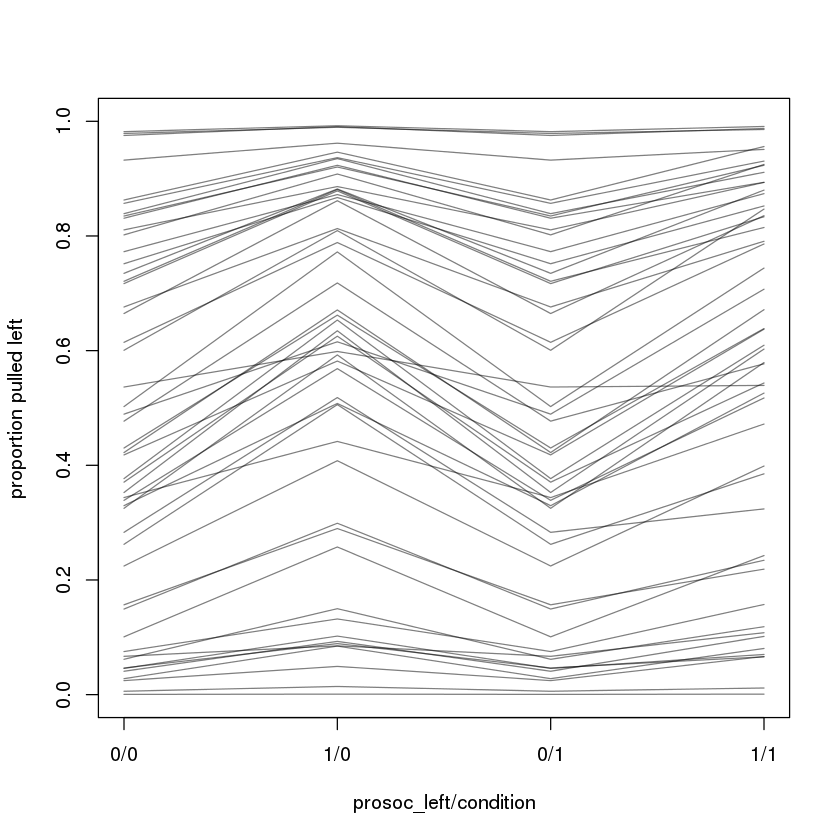

In [39]:
## R code 12.38
# empty plot
plot( 0 , 0 , type="n" , xlab="prosoc_left/condition" ,
    ylab="proportion pulled left" , ylim=c(0,1) , xaxt="n" , xlim=c(1,4) )
axis( 1 , at=1:4 , labels=c("0/0","1/0","0/1","1/1") )

# plot 50 simulated actors
for ( i in 1:50 ) lines( 1:4 , sim.actor(i) , col=col.alpha("black",0.5) )

In [40]:
## R code 12.39
# prep data
library(rethinking)
data(Kline)
d <- Kline
d$logpop <- log(d$population)
d$society <- 1:10

# fit model
m12.6 <- map2stan(
    alist(
        total_tools ~ dpois(mu),
        log(mu) <- a + a_society[society] + bp*logpop,
        a ~ dnorm(0,10),
        bp ~ dnorm(0,1),
        a_society[society] ~ dnorm(0,sigma_society),
        sigma_society ~ dcauchy(0,1)
    ),
    data=d ,
    iter=4000 , chains=3 )

Warning message:
In FUN(X[[i]], ...): data with name culture is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name contact is not numeric and not used


SAMPLING FOR MODEL 'total_tools ~ dpois(mu)' NOW (CHAIN 1).

Chain 1, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 1, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 1, Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 1, Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 1, Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 1, Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 1, Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 1, Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 1, Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 1, Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 1, Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 1, Iteration: 4000 / 4000 [100%]  (Sampling)# 
#  Elapsed Time: 5.15735 seconds (Warm-up)
#                5.84292 seconds (Sampling)
#                11.0003 seconds (Total)
# 


The following numerical problems occured the indicated number of times after warmup on chain 1
                                                                                count
Exception thrown at line 17: normal_log: Scale parameter is 0, but must be > 0!     1
When a numerical problem occurs, the Metropolis proposal gets rejected.
However, by design Metropolis proposals sometimes get rejected even when there are no numerical problems.
Thus, if the number in the 'count' column is small, do not ask about this message on stan-users.



SAMPLING FOR MODEL 'total_tools ~ dpois(mu)' NOW (CHAIN 2).

Chain 2, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 2, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 2, Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 2, Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 2, Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 2, Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 2, Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 2, Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 2, Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 2, Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 2, Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 2, Iteration: 4000 / 4000 [100%]  (Sampling)# 
#  Elapsed Time: 5.28271 seconds (Warm-up)
#                6.26178 seconds (Sampling)
#                11.5445 seconds (Total)
# 


The following numerical problems occured the indicated number of times after warmup on chain 2
                                                                                count
Exception thrown at line 17: normal_log: Scale parameter is 0, but must be > 0!     1
When a numerical problem occurs, the Metropolis proposal gets rejected.
However, by design Metropolis proposals sometimes get rejected even when there are no numerical problems.
Thus, if the number in the 'count' column is small, do not ask about this message on stan-users.



SAMPLING FOR MODEL 'total_tools ~ dpois(mu)' NOW (CHAIN 3).

Chain 3, Iteration:    1 / 4000 [  0%]  (Warmup)
Chain 3, Iteration:  400 / 4000 [ 10%]  (Warmup)
Chain 3, Iteration:  800 / 4000 [ 20%]  (Warmup)
Chain 3, Iteration: 1200 / 4000 [ 30%]  (Warmup)
Chain 3, Iteration: 1600 / 4000 [ 40%]  (Warmup)
Chain 3, Iteration: 2000 / 4000 [ 50%]  (Warmup)
Chain 3, Iteration: 2001 / 4000 [ 50%]  (Sampling)
Chain 3, Iteration: 2400 / 4000 [ 60%]  (Sampling)
Chain 3, Iteration: 2800 / 4000 [ 70%]  (Sampling)
Chain 3, Iteration: 3200 / 4000 [ 80%]  (Sampling)
Chain 3, Iteration: 3600 / 4000 [ 90%]  (Sampling)
Chain 3, Iteration: 4000 / 4000 [100%]  (Sampling)# 
#  Elapsed Time: 5.40183 seconds (Warm-up)
#                5.53789 seconds (Sampling)
#                10.9397 seconds (Total)
# 


The following numerical problems occured the indicated number of times after warmup on chain 3
                                                                                count
Exception thrown at line 17: normal_log: Scale parameter is 0, but must be > 0!     1
When a numerical problem occurs, the Metropolis proposal gets rejected.
However, by design Metropolis proposals sometimes get rejected even when there are no numerical problems.
Thus, if the number in the 'count' column is small, do not ask about this message on stan-users.
Warning message:
In FUN(X[[i]], ...): data with name culture is not numeric and not usedWarning message:
In FUN(X[[i]], ...): data with name contact is not numeric and not used


SAMPLING FOR MODEL 'total_tools ~ dpois(mu)' NOW (CHAIN 1).

Chain 1, Iteration: 1 / 1 [100%]  (Sampling)# 
#  Elapsed Time: 3e-06 seconds (Warm-up)
#                0.000163 seconds (Sampling)
#                0.000166 seconds (Total)
# 


Computing WAIC
Constructing posterior predictions


[ 6000 / 6000 ]


Warning message:
In if (object@sim$warmup2 == 0) warning("warmup samples not saved"): the condition has length > 1 and only the first element will be used

In [41]:
## R code 12.40
post <- extract.samples(m12.6)
d.pred <- list(
    logpop = seq(from=6,to=14,length.out=30),
    society = rep(1,30)
)
a_society_sims <- rnorm(20000,0,post$sigma_society)
a_society_sims <- matrix(a_society_sims,2000,10)
link.m12.6 <- link( m12.6 , n=2000 , data=d.pred ,
    replace=list(a_society=a_society_sims) )

[ 2000 / 2000 ]


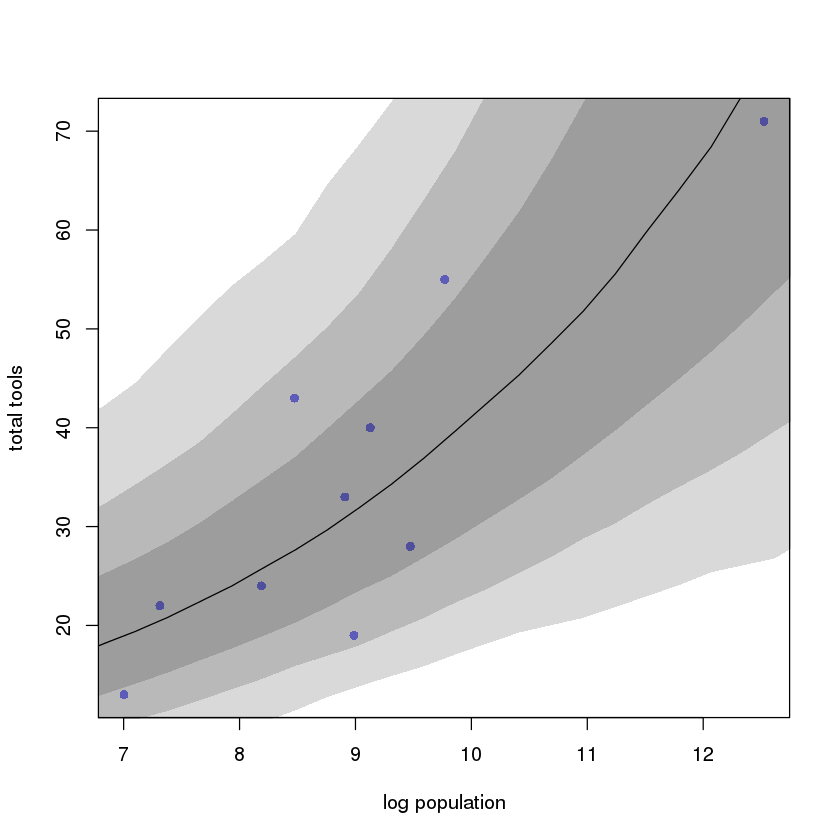

In [42]:
## R code 12.41
# plot raw data
plot( d$logpop , d$total_tools , col=rangi2 , pch=16 ,
    xlab="log population" , ylab="total tools" )

# plot posterior median
mu.median <- apply( link.m12.6 , 2 , median )
lines( d.pred$logpop , mu.median )

# plot 97%, 89%, and 67% intervals (all prime numbers)
mu.PI <- apply( link.m12.6 , 2 , PI , prob=0.97 )
shade( mu.PI , d.pred$logpop )
mu.PI <- apply( link.m12.6 , 2 , PI , prob=0.89 )
shade( mu.PI , d.pred$logpop )
mu.PI <- apply( link.m12.6 , 2 , PI , prob=0.67 )
shade( mu.PI , d.pred$logpop )

In [43]:
## R code 12.42
sort(unique(d$district))

Warning message:
In is.na(x): is.na() applied to non-(list or vector) of type 'NULL'

NULL

In [44]:
## R code 12.43
d$district_id <- as.integer(as.factor(d$district))
sort(unique(d$district_id))

ERROR: Error in `$<-.data.frame`(`*tmp*`, "district_id", value = integer(0)): replacement has 0 rows, data has 10


Warning message:
In is.na(x): is.na() applied to non-(list or vector) of type 'NULL'

NULL